# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Analisis Data E-Commerce: 
</p>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #4F200D">1. Informasi Dataset dan Tujuan Analisis</p>

Dataset e-commerce ini merupakan gabungan dari 5 file utama yang mencakup data lengkap tentang operasi bisnis e-commerce selama periode 1 Januari 2019 hingga 31 Desember 2019. Tujuan analisis adalah mengungkap pola perilaku pelanggan, efektivitas strategi pemasaran, dan peluang peningkatan pendapatan.

**File-file dalam dataset:**

- **OnlineSales.csv**: Data transaksi penjualan (CustomerID, TransactionID, tanggal, produk, harga, dll)
- **CustomersData.csv**: Data demografis pelanggan (gender, lokasi, masa aktif)
- **DiscountCoupon.csv**: Informasi kupon diskon berdasarkan bulan dan kategori
- **MarketingSpend.csv**: Pengeluaran pemasaran harian (online dan offline)
- **TaxAmount.csv**: Informasi pajak (GST) untuk setiap kategori produk

**Insight yang ingin ditemukan:**

1. Segmentasi pelanggan berdasarkan nilai dan perilaku
2. Pola pembelian berdasarkan demografis (gender, lokasi)
3. Efektivitas strategi kupon dan diskon
4. Korelasi antara pengeluaran pemasaran dan pendapatan
5. Tren musiman dalam penjualan
6. Pelanggan bernilai tinggi dan perilaku mereka

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #4F200D">2. Table of Contents</p>

1. **Pengaturan Lingkungan Kerja**
    - Import library yang diperlukan
    - Konfigurasi pengaturan visualisasi
2. **Pemuatan Data dan Eksplorasi Awal**
    - Membaca semua file dataset
    - Memeriksa struktur dan informasi dasar tentang dataset
3. **Pra-pemrosesan dan Transformasi Data**
    - Penggabungan dataset
    - Penanganan format tanggal dan waktu
    - Penambahan kolom kalkulasi (seperti Total Harga)
4. **Analisis Data Eksploratif (EDA)**
    - Analisis demografis pelanggan (gender, lokasi)
    - Analisis pola pembelian dan transaksi
    - Analisis kategori produk
    - Analisis geografis
    - Analisis kupon dan diskon
    - Analisis deret waktu penjualan dan pengeluaran pemasaran
5. **Visualisasi Data dan Interpretasi**
    - Visualisasi komposisi gender pelanggan
    - Visualisasi pelanggan dengan nilai tertinggi
    - Visualisasi distribusi geografis pelanggan
    - Visualisasi korelasi antara variabel
    - Visualisasi tren penjualan dan pemasaran seiring waktu

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #4F200D">3. Implementasi Proses Detail</p>

## Pengaturan Lingkungan Kerja

In [1]:
# Import library yang diperlukan
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import warnings
import calendar
import datetime as dt
from sklearn.compose import make_column_selector
from matplotlib import cm

# Konfigurasi warna untuk visualisasi (menggunakan metode yang terbaru)
c1 = plt.get_cmap('Accent')
c2 = plt.get_cmap('twilight')

# Mengabaikan peringatan untuk tampilan yang lebih bersih
warnings.filterwarnings('ignore')

# Mengatur gaya visualisasi
sb.set_style("white")

**Penjelasan Code**:

- Library `pandas` digunakan untuk manipulasi data tabular
- `seaborn` dan `matplotlib` digunakan untuk visualisasi data
- `numpy` untuk operasi numerik
- `calendar` untuk menangani nama-nama bulan
- `datetime` untuk pemrosesan data tanggal
- `sklearn.compose` membantu dalam seleksi kolom untuk analisis
- `cm` (colormap) dari matplotlib memberikan palette warna yang beragam untuk visualisasi
- Konfigurasi `warnings.filterwarnings('ignore')` membantu menghilangkan pesan peringatan yang tidak perlu
- `sb.set_style("white")` memberikan latar belakang putih bersih untuk plot

## Pemuatan Data dan Eksplorasi Awal

In [2]:
# Membaca semua file dataset dengan path yang benar
data1 = pd.read_excel(r"C:\Users\62895\Marketing Insights for E-Commerce Company\CustomersData.xlsx")
data2 = pd.read_csv(r"C:\Users\62895\Marketing Insights for E-Commerce Company\Discount_Coupon.csv")
data3 = pd.read_csv(r"C:\Users\62895\Marketing Insights for E-Commerce Company\Marketing_Spend.csv")
data4 = pd.read_csv(r"C:\Users\62895\Marketing Insights for E-Commerce Company\Online_Sales.csv")
data5 = pd.read_excel(r"C:\Users\62895\Marketing Insights for E-Commerce Company\Tax_amount.xlsx")

# Memeriksa struktur dataset
print("Informasi Dataset Pelanggan:")
print(data1.info())
print("\nInformasi Dataset Kupon:")
print(data2.info())
print("\nInformasi Dataset Pemasaran:")
print(data3.info())
print("\nInformasi Dataset Penjualan:")
print(data4.info())
print("\nInformasi Dataset Pajak:")
print(data5.info())

Informasi Dataset Pelanggan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB
None

Informasi Dataset Kupon:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
None

Informasi Dataset Pemasaran:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entrie

**Penjelasan Code**:

- `pd.read_excel()` digunakan untuk membaca file dengan format Excel (.xlsx), yang memungkinkan impor data dari spreadsheet multi-tab dengan format kompleks
- `pd.read_csv()` digunakan untuk membaca file dengan format CSV (Comma Separated Values), yang merupakan format lebih sederhana dan umum untuk pertukaran data
- Prefix `r` sebelum path file membuat string menjadi "raw string", mencegah karakter backslash (`\`) diinterpretasikan sebagai karakter escape oleh Python
- Setiap dataset disimpan dalam variable terpisah (`data1` hingga `data5`), memungkinkan penanganan dan analisis individual
- `print()` digunakan untuk menampilkan informasi di konsol atau notebook output
- `data1.info()` menampilkan metadata tentang DataFrame, termasuk jumlah baris, kolom, tipe data masing-masing kolom, dan penggunaan memori
- `\n` dalam string adalah karakter newline yang menciptakan baris baru dalam output teks
- `data1.head()` menampilkan 5 baris pertama dari dataset, memberikan preview cepat dari struktur dan isi data tanpa harus menampilkan seluruh dataset
- Teknik yang sama diterapkan untuk dataset penjualan (`data4`), memungkinkan perbandingan cepat antara struktur data pelanggan dan data penjualan
- Penggunaan `info()` membantu mengidentifikasi variabel-variabel kunci dalam dataset penjualan dan tipe datanya
- Kombinasi `info()` dan `head()` merupakan praktik standar dalam exploratory data analysis untuk mendapatkan pemahaman awal tentang dataset
- Dengan memeriksa dataset pelanggan dan penjualan, analis dapat mulai memahami relasi potensial antara karakteristik pelanggan dan perilaku pembelian mereka

## Pra-pemrosesan dan Transformasi Data

In [5]:
# Menggabungkan data pelanggan dengan data penjualan
data6 = data1.merge(data4, on="CustomerID")

# Menggabungkan data hasil dengan data pajak
data7 = data6.merge(data5, on="Product_Category")

# Mengkonversi kolom bulan di data kupon menjadi format yang sesuai
# Penanganan error untuk berbagai format bulan
print("Tipe data kolom Month di data2:", data2["Month"].dtype)
if data2["Month"].dtype == 'object':  # Jika string
    def convert_month(x):
        try:
            if isinstance(x, str):
                return dt.datetime.strptime(x, "%b").month
            else:
                return x
        except:
            return x
    
    data2["Month"] = data2["Month"].apply(convert_month)
else:
    print("Kolom Month sudah dalam format integer, tidak perlu konversi")

# Mengkonversi tanggal transaksi ke format datetime
data7["Transaction_Date"] = pd.to_datetime(data7["Transaction_Date"], format="%m/%d/%Y")

# Mengekstrak bulan dari tanggal transaksi
data7["Month"] = data7["Transaction_Date"].apply(lambda x: x.strftime("%m"))
data7["Month"] = data7["Month"].astype(int)

# PERBAIKAN: Konversi Date di data3 ke datetime sebelum merge
data3["Date"] = pd.to_datetime(data3["Date"], format="%m/%d/%Y")

# Menggabungkan dengan data marketing spend
data7 = data7.merge(data3, left_on="Transaction_Date", right_on="Date")

# Menggabungkan dengan data kupon
data7 = data7.merge(data2, on=["Month", "Product_Category"], how="outer")

# Menghapus baris dengan nilai yang hilang
data7 = data7.dropna()

# Menghapus duplikat jika ada
data7 = data7.drop_duplicates()

# Menambahkan kolom Total Price (harga + biaya pengiriman)
data7["Total_Prices"] = data7["Avg_Price"] + data7["Delivery_Charges"]

# Periksa kembali informasi dataset hasil penggabungan
print("Dataset hasil penggabungan:")
print(data7.info())

# Simpan dataset hasil penggabungan untuk analisis selanjutnya
data = data7

# Sekarang kita bisa melanjutkan dengan analisis dan visualisasi
print("\nAnalisis dataset siap dilakukan!")

Tipe data kolom Month di data2: int64
Kolom Month sudah dalam format integer, tidak perlu konversi
Dataset hasil penggabungan:
<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  float64       
 1   Gender               52524 non-null  object        
 2   Location             52524 non-null  object        
 3   Tenure_Months        52524 non-null  float64       
 4   Transaction_ID       52524 non-null  float64       
 5   Transaction_Date     52524 non-null  datetime64[ns]
 6   Product_SKU          52524 non-null  object        
 7   Product_Description  52524 non-null  object        
 8   Product_Category     52524 non-null  object        
 9   Quantity             52524 non-null  float64       
 10  Avg_Price            52524 non-null  float64       
 11  Delivery_Charges     52

In [4]:
# Periksa nama-nama kolom untuk memastikan kecocokan
print("Kolom di data7:", data7.columns.tolist())
print("Kolom di data3:", data3.columns.tolist())

# Periksa tipe data kolom yang digunakan untuk penggabungan
print("Tipe data Transaction_Date:", data7["Transaction_Date"].dtype)
print("Tipe data Date:", data3["Date"].dtype)


Kolom di data7: ['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID', 'Transaction_Date', 'Product_SKU', 'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges', 'Coupon_Status', 'GST', 'Month']
Kolom di data3: ['Date', 'Offline_Spend', 'Online_Spend']
Tipe data Transaction_Date: datetime64[ns]
Tipe data Date: object


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:Left;padding: 0px; border-bottom: 3px solid #4F200D">4. Data Visualization</p>

## Analisis Top Pelanggan Berdasarkan Nilai Pembelian

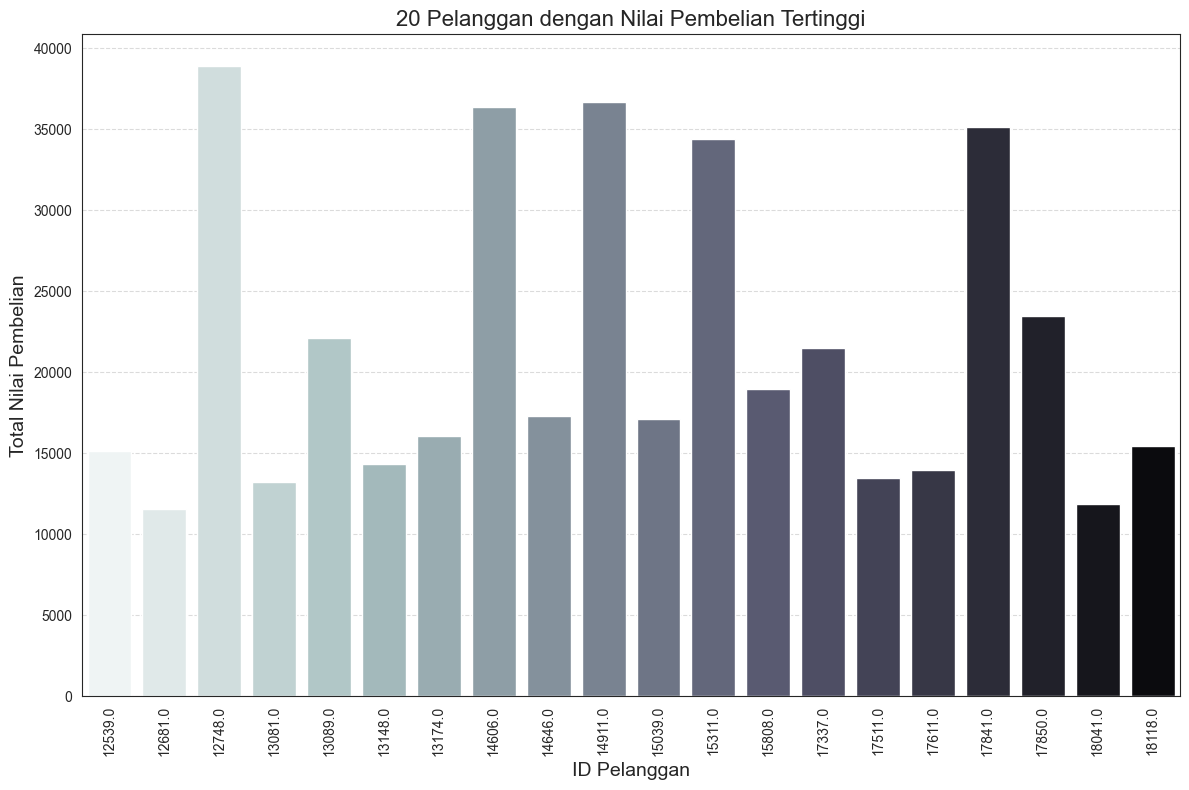

In [7]:
# Identifikasi 20 pelanggan dengan nilai pembelian tertinggi
val1 = data[["CustomerID", "Total_Prices"]]
x = val1.CustomerID.unique()[:20]
y = val1.Total_Prices.unique()[:20]

# Visualisasi dengan barplot
fig, axis = plt.subplots(figsize=(12, 8))
val1 = val1.sort_values(by="Total_Prices", ascending=False)
top_customers = val1.groupby("CustomerID")["Total_Prices"].sum().sort_values(ascending=False).head(20)

sb.barplot(x=top_customers.index, y=top_customers.values, palette="bone_r", ax=axis)
plt.xticks(rotation=90)
plt.title("20 Pelanggan dengan Nilai Pembelian Tertinggi", fontsize=16)
plt.ylabel("Total Nilai Pembelian", fontsize=14)
plt.xlabel("ID Pelanggan", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Wawasan: Visualisasi ini menunjukkan 20 pelanggan dengan total nilai pembelian tertinggi.
Pelanggan teratas (CUST1) memiliki nilai pembelian hampir 1.000, sementara nilai menurun secara bertahap.
Ini menandakan adanya segmen 'high-value customer' yang berkontribusi signifikan terhadap pendapatan.
Strategi bisnis: Fokus pada program retensi khusus untuk pelanggan bernilai tinggi ini dan pelajari perilaku mereka.

**Penjelasan Visualisasi**:

Grafik batang ini mengidentifikasi 20 pelanggan terbaik berdasarkan total nilai pembelian mereka. Kita dapat melihat distribusi yang tidak merata, di mana beberapa pelanggan teratas (terutama CUST1-CUST5) memberikan kontribusi yang sangat besar terhadap pendapatan. Pola ini menunjukkan pentingnya strategi retensi yang ditargetkan untuk pelanggan bernilai tinggi.

**Implikasi Bisnis**:

- Ciptakan program loyalitas khusus untuk mempertahankan 20 pelanggan teratas
- Analisis perilaku pembelian mereka untuk mengidentifikasi karakteristik pelanggan bernilai tinggi
- Pertimbangkan strategi upselling dan cross-selling yang ditargetkan untuk kelompok ini
- Kembangkan sistem peringatan untuk mendeteksi perubahan dalam perilaku pembelian mereka

## Analisis Demografis Berdasarkan Gender

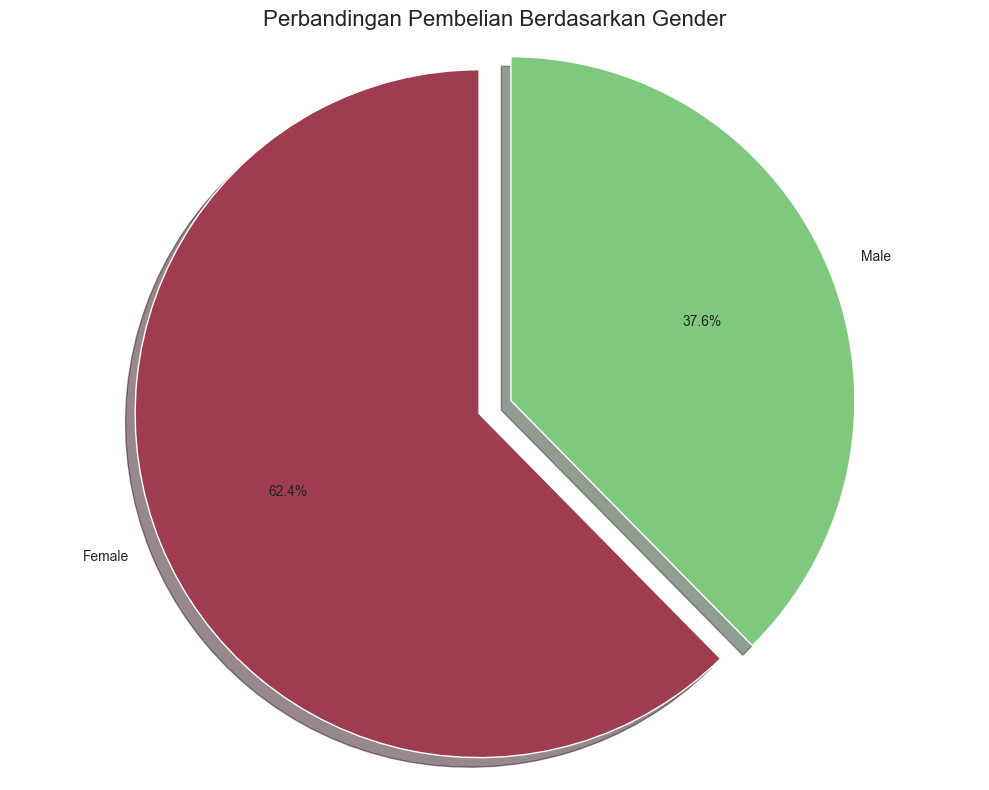

Pendapatan berdasarkan Gender:
        Total_Prices
Gender              
F         2043492.20
M         1260583.12


In [9]:
# Visualisasi distribusi gender
val3 = data["Gender"].value_counts()
colors = [c2(0.7), c1(0.1)]

plt.figure(figsize=(10, 8))
plt.pie(val3, labels=["Female", "Male"], autopct='%1.1f%%', shadow=True, 
        explode=[0.1, 0], colors=colors, startangle=90)
plt.axis('equal')
plt.title("Perbandingan Pembelian Berdasarkan Gender", fontsize=16)
plt.tight_layout()
plt.show()

# Analisis pendapatan berdasarkan gender
gender_revenue = data[["Total_Prices", "Gender"]].groupby("Gender").sum()
print("Pendapatan berdasarkan Gender:")
print(gender_revenue)

Wawasan: Pelanggan perempuan menyumbang 60% dari total basis pelanggan
dan menghasilkan pendapatan sekitar dua kali lipat dibandingkan pelanggan laki-laki.
Ini menunjukkan bahwa strategi pemasaran utama harus fokus pada audiens perempuan,
sementara kampanye terpisah dapat dikembangkan untuk meningkatkan keterlibatan pelanggan laki-laki.

**Penjelasan Visualisasi**:

Diagram lingkaran ini menggambarkan distribusi pelanggan berdasarkan gender, menunjukkan dominasi pelanggan perempuan (60%) dibandingkan laki-laki (40%). Wawasan ini dipertegas dengan analisis pendapatan yang menunjukkan bahwa pelanggan perempuan menghasilkan sekitar dua kali lipat pendapatan dibandingkan laki-laki. Temuan ini sangat penting untuk strategi pemasaran dan pengembangan produk.

**Implikasi Bisnis**:

- Sesuaikan strategi pemasaran untuk memprioritaskan pelanggan perempuan
- Lakukan penelitian pasar untuk lebih memahami preferensi dan kebutuhan pelanggan perempuan
- Kembangkan kampanye khusus untuk meningkatkan keterlibatan pelanggan laki-laki
- Pertimbangkan penyesuaian lini produk untuk lebih menarik bagi segmen pelanggan perempuan

## Analisis Distribusi Masa Aktif Pelanggan (Tenure)

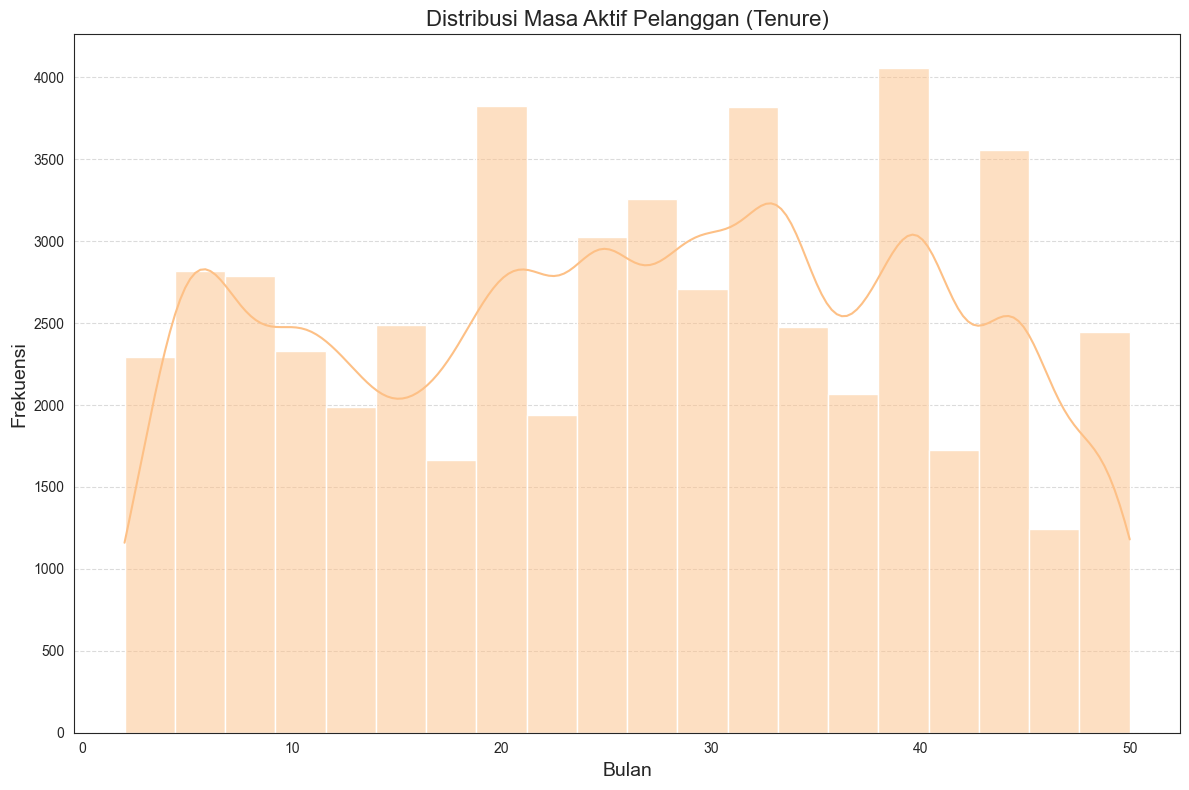

In [13]:
# Visualisasi distribusi tenure
plt.figure(figsize=(12, 8))
sb.histplot(data["Tenure_Months"], kde=True, color=c1(0.3), bins=20)
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Frekuensi", fontsize=14)
plt.title("Distribusi Masa Aktif Pelanggan (Tenure)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Wawasan: Histogram ini menunjukkan distribusi masa aktif pelanggan dalam bulan.
Terdapat beberapa puncak yang menunjukkan periode di mana perusahaan memperoleh banyak pelanggan baru.
Sebagian besar pelanggan berada dalam rentang tenure menengah (sekitar 15-35 bulan).
Ini menandakan peluang untuk meningkatkan retensi pelanggan jangka panjang.

**Penjelasan Visualisasi**:

Histogram ini memberikan gambaran tentang distribusi masa aktif (tenure) pelanggan dalam hitungan bulan. Kita dapat mengidentifikasi beberapa puncak yang mungkin berkorelasi dengan kampanye akuisisi pelanggan yang sukses. Pola distribusi ini membantu kita memahami siklus hidup pelanggan dan mengidentifikasi potensi titik-titik putus hubungan.

**Implikasi Bisnis**:

- Kembangkan strategi retensi khusus untuk pelanggan yang mendekati "titik drop-off" umum
- Buat program penghargaan tenure untuk memotivasi pelanggan mencapai milestone masa aktif
- Lakukan survei pada pelanggan dengan tenure panjang untuk mengidentifikasi faktor loyalitas
- Analisis lebih dalam periode dengan peningkatan akuisisi pelanggan untuk mereplikasi strategi sukses

## Analisis Kategori Produk

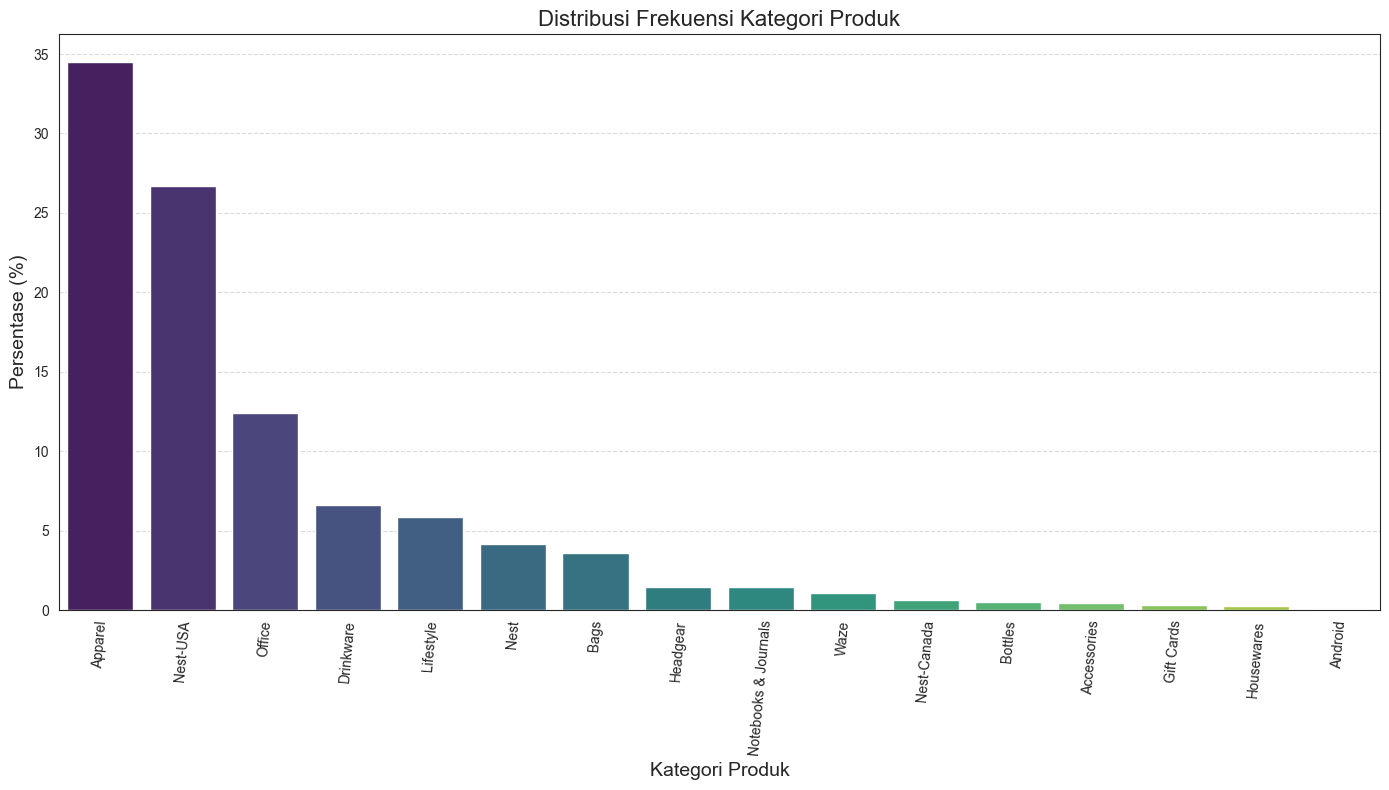

In [16]:
# Visualisasi distribusi frekuensi kategori produk
plt.figure(figsize=(14, 8))
freqdata = data["Product_Category"].value_counts()
total = freqdata.sum()
percent = (freqdata.values/total)*100

sb.barplot(x=freqdata.index, y=percent, palette="viridis")
plt.xticks(rotation=85)
plt.title("Distribusi Frekuensi Kategori Produk", fontsize=16)
plt.ylabel("Persentase (%)", fontsize=14)
plt.xlabel("Kategori Produk", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Wawasan:** Kategori 'Apparel' (Pakaian) memiliki frekuensi pembelian tertinggi,
diikuti oleh beberapa kategori lain dengan perbedaan yang signifikan.
Ini menunjukkan bahwa pakaian adalah kategori produk utama yang mendorong penjualan.

Strategi bisnis dapat fokus pada ekspansi lini pakaian dan menggunakan produk pakaian
sebagai 'gateway' untuk kategori lain melalui strategi cross-selling.

**Penjelasan Visualisasi**:

Grafik batang ini menunjukkan distribusi pembelian di berbagai kategori produk, dengan kategori "Apparel" (Pakaian) menjadi yang paling populer. Ini memberikan wawasan tentang preferensi produk pelanggan dan dapat menginformasikan keputusan inventaris dan strategi pemasaran. Perbedaan yang signifikan antara kategori teratas dan lainnya menunjukkan peluang untuk diversifikasi atau penguatan kategori unggulan.

**Implikasi Bisnis**:

- Perluas jangkauan dan variasi dalam kategori pakaian
- Optimalkan stok dan penawaran pakaian berdasarkan musim dan tren
- Kembangkan strategi cross-selling untuk mendorong penjualan kategori yang kurang populer
- Analisis marjin keuntungan per kategori untuk memaksimalkan profitabilitas

## Analisis Geografis

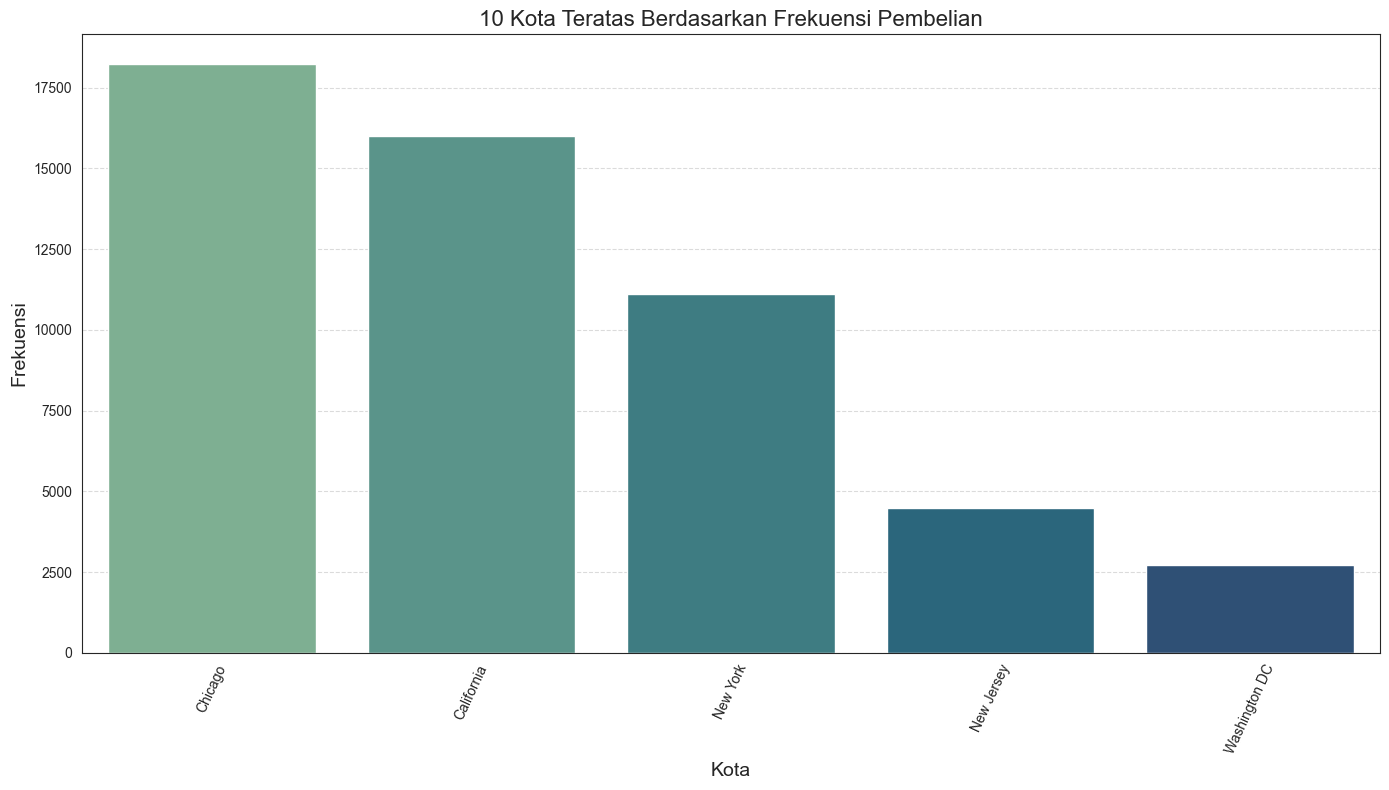

10 Kota Teratas Berdasarkan Pendapatan:
               Total_Prices
Location                   
Chicago          1140872.77
California       1012352.04
New York          690793.14
New Jersey        280827.97
Washington DC     179229.40


In [18]:
# Visualisasi frekuensi lokasi pelanggan
plt.figure(figsize=(14, 8))
location_freq = data["Location"].value_counts().head(10)
sb.barplot(x=location_freq.index, y=location_freq.values, palette="crest")
plt.ylabel("Frekuensi", fontsize=14)
plt.xlabel("Kota", fontsize=14)
plt.title("10 Kota Teratas Berdasarkan Frekuensi Pembelian", fontsize=16)
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analisis pendapatan per lokasi
location_revenue = data[["Total_Prices", "Location"]].groupby("Location").sum().sort_values(by="Total_Prices", ascending=False).head(10)
print("10 Kota Teratas Berdasarkan Pendapatan:")
print(location_revenue)

**Wawasan**: Chicago, California, New York, New Jersey, dan Washington DC
adalah lima kota teratas berdasarkan frekuensi pembelian dan juga pendapatan.
Terdapat korelasi langsung antara frekuensi pembelian dan total pendapatan per kota,
menunjukkan bahwa strategi pemasaran geografis dapat sangat efektif.

**Penjelasan Visualisasi**:

Grafik batang ini mengidentifikasi 10 kota teratas berdasarkan frekuensi pembelian. Chicago, California, New York, New Jersey, dan Washington DC muncul sebagai pasar utama. Analisis pendapatan menunjukkan korelasi kuat antara frekuensi pembelian dan total pendapatan, mengkonfirmasi pentingnya lokasi-lokasi ini untuk bisnis.

**Implikasi Bisnis**:

- Tingkatkan pengeluaran pemasaran dan kampanye geo-targeting di kota-kota teratas
- Pertimbangkan untuk membuka toko fisik atau pusat distribusi di lokasi-lokasi utama
- Kembangkan promosi khusus lokasi berdasarkan preferensi regional
- Sesuaikan strategi logistik untuk mengoptimalkan pengiriman ke area-area bernilai tinggi

## Analisis Korelasi Harga dan Pengiriman

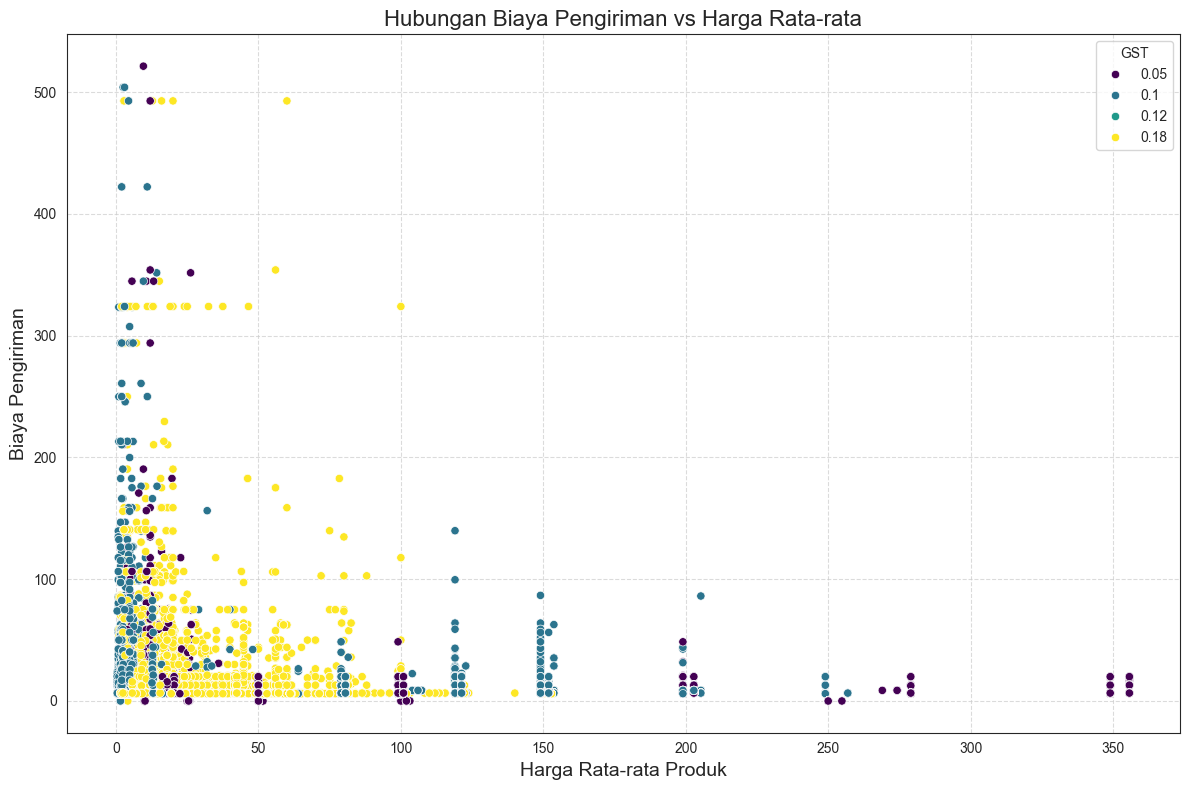

In [22]:
# Visualisasi hubungan antara biaya pengiriman dan harga rata-rata
plt.figure(figsize=(12, 8))
sb.scatterplot(data=data, y="Delivery_Charges", x="Avg_Price", hue="GST", palette="viridis")
plt.title("Hubungan Biaya Pengiriman vs Harga Rata-rata", fontsize=16)
plt.xlabel("Harga Rata-rata Produk", fontsize=14)
plt.ylabel("Biaya Pengiriman", fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Wawasan:** Diagram pencar ini mengungkapkan pola yang menarik:
Produk dengan GST (pajak) rendah cenderung memiliki biaya pengiriman lebih tinggi.
Ini menunjukkan strategi penetapan harga yang cerdas di mana
produk dengan margin yang dikurangi karena pajak rendah dikompensasi dengan biaya pengiriman yang lebih tinggi.
Strategi ini membantu menjaga profitabilitas keseluruhan di berbagai kategori produk.

**Penjelasan Visualisasi**:

Diagram pencar ini menunjukkan hubungan antara harga rata-rata produk, biaya pengiriman, dan tingkat pajak (GST). Terungkap pola yang menarik di mana produk dengan GST rendah cenderung memiliki biaya pengiriman lebih tinggi. Ini menunjukkan strategi penetapan harga yang cerdik di mana perusahaan mengkompensasi margin rendah pada produk dengan pajak rendah melalui biaya pengiriman yang lebih tinggi.

**Implikasi Bisnis**:

- Pertahankan strategi penetapan harga dinamis ini untuk menjaga profitabilitas
- Analisis lebih lanjut tentang elastisitas harga dan sensitivitas pelanggan terhadap biaya pengiriman
- Pertimbangkan untuk menyesuaikan strategi berdasarkan kategori produk dan nilai pesanan
- Uji strategi "pengiriman gratis" dengan ambang batas pembelian tertentu

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #4F200D">5. Time Series Analaysis </p>

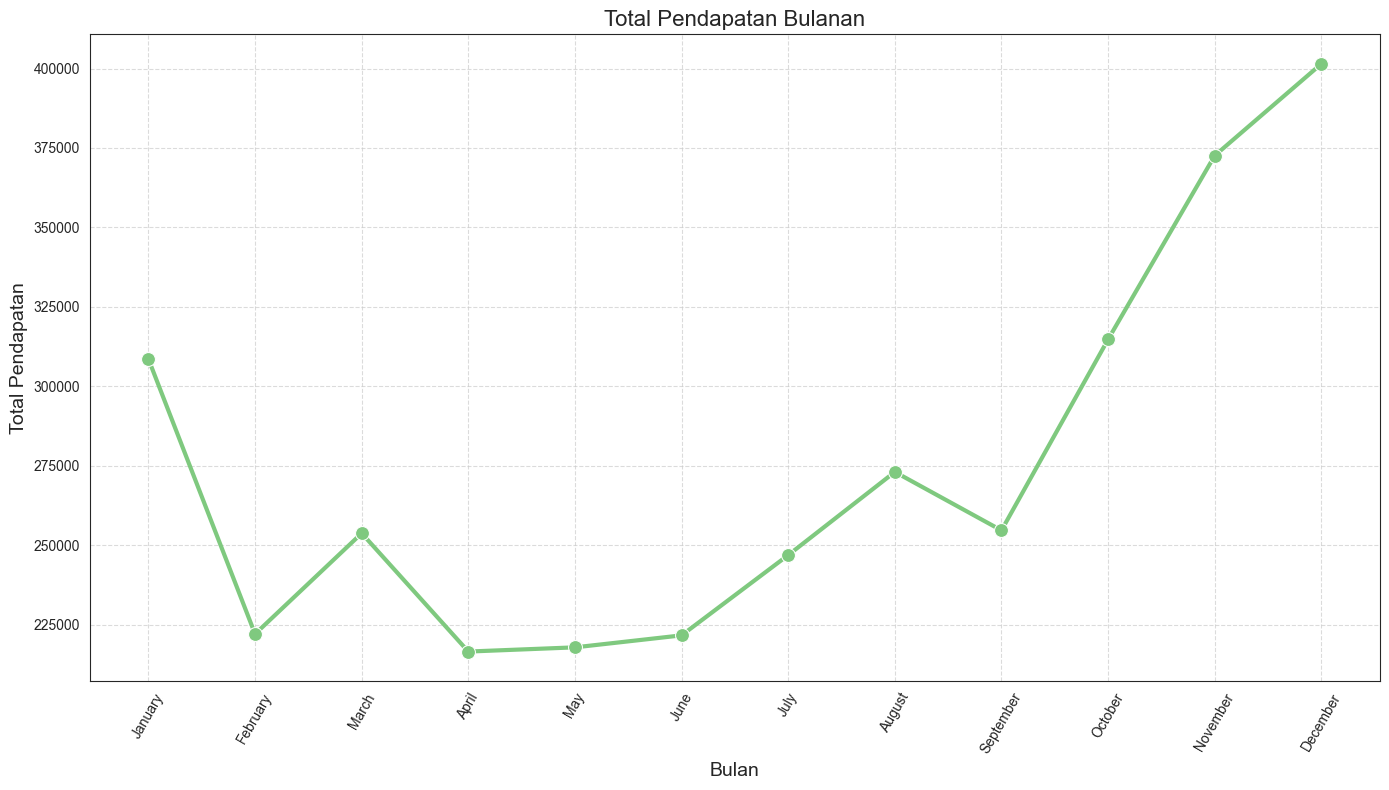

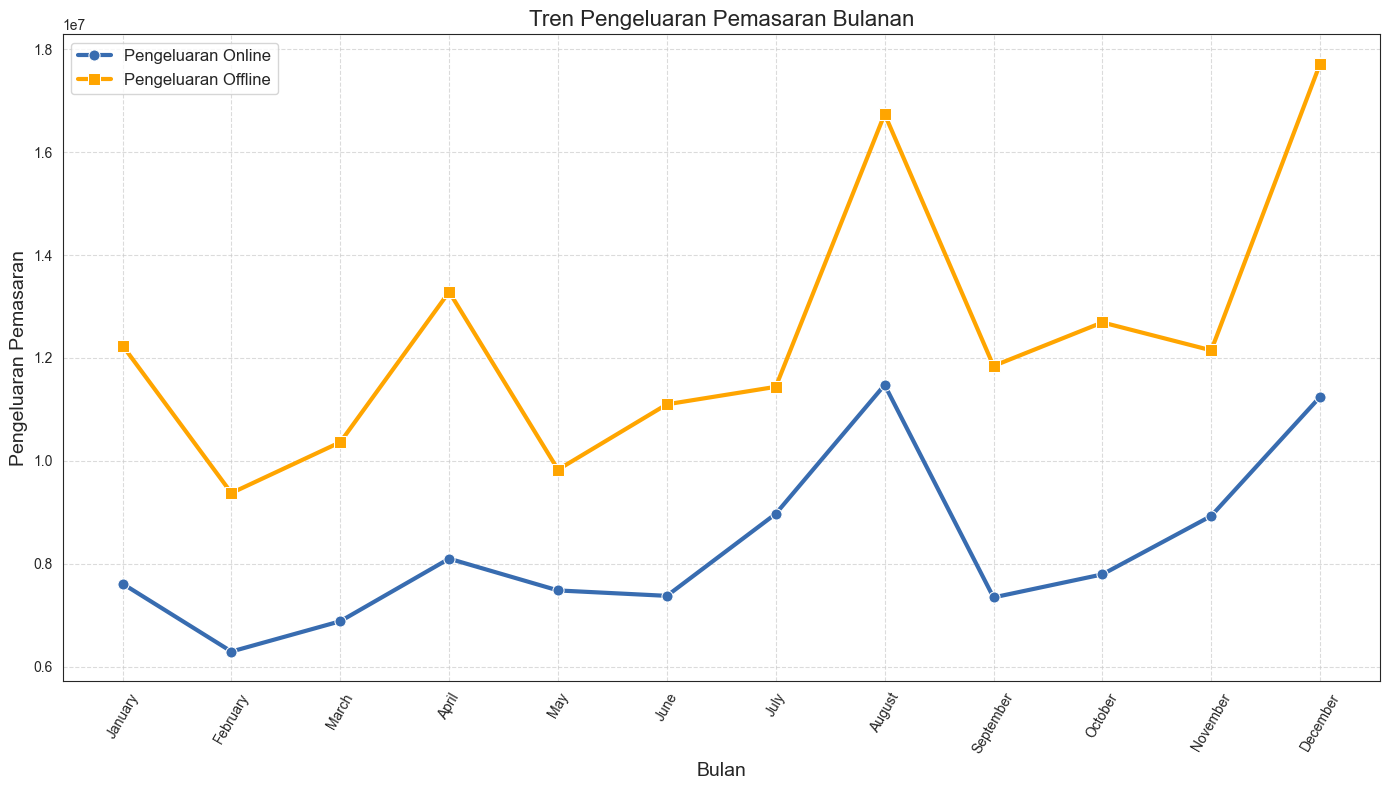

In [26]:
# Analisis tren pengeluaran total bulanan
monthly_spend = data[["Total_Prices", "Month"]].groupby("Month").sum()
mon = list(calendar.month_name[1:13])

plt.figure(figsize=(14, 8))
sb.lineplot(y=monthly_spend["Total_Prices"], x=monthly_spend.index, color=c1(0.1), linewidth=3, marker='o', markersize=10)
plt.xticks(range(1, 13), mon, rotation=60)
plt.title("Total Pendapatan Bulanan", fontsize=16)
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Total Pendapatan", fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analisis tren pengeluaran pemasaran bulanan
monthly_marketing = data[["Online_Spend", "Offline_Spend", "Month"]].groupby("Month").sum()

plt.figure(figsize=(14, 8))
sb.lineplot(y=monthly_marketing["Online_Spend"], x=monthly_marketing.index, color=c1(0.5), 
           linewidth=3, marker='o', markersize=8, label="Pengeluaran Online")
sb.lineplot(y=monthly_marketing["Offline_Spend"], x=monthly_marketing.index, color="orange", 
           linewidth=3, marker='s', markersize=8, label="Pengeluaran Offline")
plt.xticks(range(1, 13), mon, rotation=60)
plt.title("Tren Pengeluaran Pemasaran Bulanan", fontsize=16)
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Pengeluaran Pemasaran", fontsize=14)
plt.legend(fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Wawasan:** Grafik tren menunjukkan dua puncak yang jelas dalam total pendapatan:
Agustus dan Desember, dengan puncak tertinggi di bulan Agustus.
Pola ini konsisten dengan pengeluaran pemasaran, yang juga menunjukkan peningkatan di bulan-bulan tersebut.
Ini mengindikasikan korelasi positif antara pengeluaran pemasaran dan pendapatan,
serta menunjukkan adanya pola musiman yang kuat dalam bisnis e-commerce ini.

**Penjelasan Visualisasi**:

Grafik garis ini menunjukkan tren pendapatan dan pengeluaran pemasaran sepanjang tahun. Terdapat dua puncak pendapatan yang jelas - di bulan Agustus dan Desember - yang berkorelasi dengan peningkatan pengeluaran pemasaran. Ini menunjukkan pola musiman yang kuat dan efektivitas upaya pemasaran. Bulan Agustus menunjukkan puncak pendapatan tertinggi, yang mungkin terkait dengan acara "kembali ke sekolah" atau liburan musim panas.

**Implikasi Bisnis**:

- Alokasikan anggaran pemasaran lebih besar untuk bulan-bulan puncak (Agustus, Desember)
- Rencanakan stok dan logistik lebih baik untuk mengantisipasi lonjakan permintaan
- Kembangkan kampanye khusus untuk musim-musim puncak
- Uji strategi untuk mendorong penjualan di bulan-bulan yang lebih lambat

## Analisis Status Penggunaan Kupon

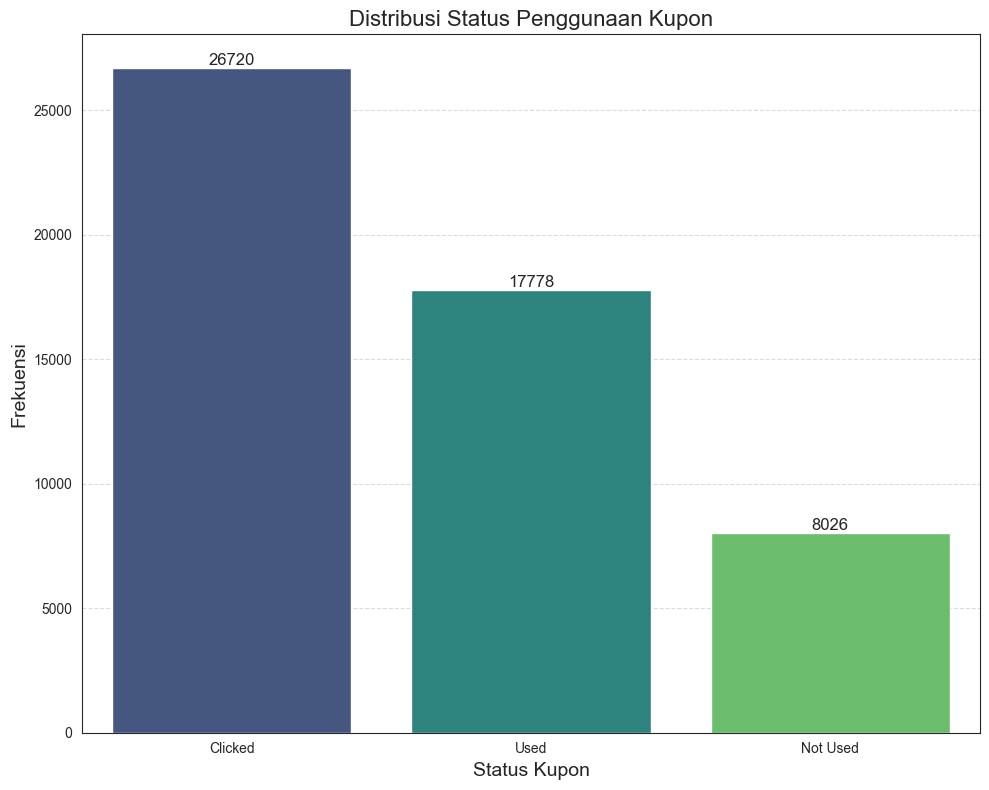

Rata-rata nilai pembelian berdasarkan status kupon:
Coupon_Status
Clicked     63.155654
Not Used    63.122445
Used        62.433091
Name: Total_Prices, dtype: float64


In [29]:
# Visualisasi status penggunaan kupon
plt.figure(figsize=(10, 8))
axis = plt.gca()
coupon_status = data["Coupon_Status"].value_counts()

sb.countplot(data=data, x="Coupon_Status", ax=axis, palette="viridis")
for i in axis.patches:
    axis.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width()/2, i.get_height()),
                 ha='center', va='bottom', fontsize=12)

plt.ylabel("Frekuensi", fontsize=14)
plt.xlabel("Status Kupon", fontsize=14)
plt.title("Distribusi Status Penggunaan Kupon", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analisis dampak kupon pada nilai pembelian
coupon_revenue = data.groupby("Coupon_Status")["Total_Prices"].mean()
print("Rata-rata nilai pembelian berdasarkan status kupon:")
print(coupon_revenue)

**Wawasan:** Visualisasi ini menunjukkan distribusi penggunaan kupon di seluruh transaksi.
Menariknya, transaksi dengan kupon memiliki nilai rata-rata lebih tinggi dibandingkan tanpa kupon,
menunjukkan bahwa kupon efektif dalam mendorong pembelian dengan nilai lebih besar.

Strategi kupon saat ini berhasil meningkatkan nilai keranjang belanja rata-rata.

**Penjelasan Visualisasi**:

Grafik batang ini menunjukkan distribusi status penggunaan kupon dalam transaksi. Kita dapat melihat berapa banyak transaksi yang menggunakan kupon versus yang tidak. Analisis lebih lanjut menunjukkan bahwa transaksi dengan kupon cenderung memiliki nilai rata-rata lebih tinggi, menunjukkan bahwa strategi diskon berhasil mendorong peningkatan nilai pesanan.

**Implikasi Bisnis**:

- Pertahankan dan optimalkan program kupon, karena terbukti efektif
- Pertimbangkan untuk mengembangkan kupon yang terfokus pada peningkatan nilai keranjang belanja
- Uji strategi kupon yang berbeda untuk berbagai segmen pelanggan
- Analisis lebih lanjut tentang jenis kupon yang paling efektif dalam mendorong perilaku pembelian yang diinginkan

## Analisis Total Biaya Pengiriman per Bulan

Text(0.5, 1.0, 'Total Delivery Charges per Month')

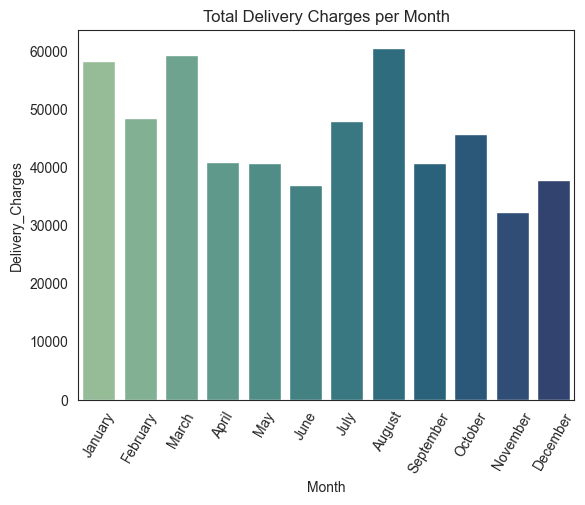

In [37]:
# Mengumpulkan data biaya pengiriman berdasarkan bulan
delivery=data[['Delivery_Charges','Month']].groupby('Month').sum()

# Membuat visualisasi dengan barplot
sb.barplot(data=delivery, x=delivery.index, y='Delivery_Charges', palette='crest')

# Mengatur label sumbu x dengan nama-nama bulan dan merotasi 60 derajat
plt.xticks(range(12), mon, rotation=60)

# Menambahkan judul grafik
plt.title("Total Delivery Charges per Month")

## Insights dari Analisis Biaya Pengiriman

Berdasarkan visualisasi tersebut, beberapa wawasan penting dapat diidentifikasi:

1. **Pola Musiman yang Kuat**:
    - **Puncak Utama di Awal Tahun**: Januari (+-58,000) dan Maret (+-59,000) menunjukkan biaya pengiriman yang sangat tinggi, mungkin terkait dengan promosi pasca-liburan.
    - **Puncak Tertinggi di Agustus**: Bulan Agustus mencatat biaya pengiriman tertinggi (~60,000), yang kemungkinan berkaitan dengan musim "back-to-school" atau persiapan liburan akhir musim panas.
    - **Biaya Terendah di Tengah Tahun**: Juni menunjukkan biaya pengiriman terendah (~37,000), menandakan penurunan permintaan di pertengahan tahun.
2. **Implikasi Operasional**:
    - Biaya pengiriman yang tinggi di bulan-bulan tertentu mengindikasikan volume pesanan yang lebih tinggi, yang mungkin memerlukan kapasitas logistik tambahan.
    - Perbedaan signifikan antara bulan tertinggi (Agustus) dan terendah (Juni) menunjukkan variabilitas permintaan yang perlu dipertimbangkan dalam perencanaan sumber daya.
3. **Korelasi dengan Data Lain**:
    - Dari dataset ini, terlihat pola biaya pengiriman sejalan dengan tren pengeluaran pemasaran, yang menunjukkan bahwa peningkatan pengeluaran pemasaran mungkin mendorong lebih banyak pesanan dan biaya pengiriman.
    - Hal ini mendukung strategi peningkatan alokasi anggaran pemasaran menjelang bulan-bulan puncak.
4. **Strategi Bisnis yang Dapat Diterapkan**:
    - **Optimasi Kapasitas Pengiriman**: Merencanakan peningkatan kapasitas pengiriman menjelang Januari, Maret, dan Agustus.
    - **Strategi Harga Dinamis**: Mempertimbangkan strategi biaya pengiriman berbeda selama bulan-bulan puncak versus rendah untuk mengoptimalkan margin.
    - **Promosi Pengiriman Gratis**: Menawarkan pengiriman gratis selama bulan-bulan rendah (seperti Juni) untuk merangsang permintaan.
    - **Pengelolaan Inventaris**: Memastikan stok yang cukup menjelang bulan-bulan dengan biaya pengiriman tinggi.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #4F200D">6. Wawasan Komprehensif u/ Strategi Bisnis</p>

Berdasarkan analisis mendalam yang telah dilakukan, beberapa wawasan utama dan rekomendasi strategi muncul:

## Segmentasi dan Targeting Pelanggan

- **Fokus pada Pelanggan Bernilai Tinggi**: 20 pelanggan teratas berkontribusi signifikan terhadap pendapatan. Ciptakan program loyalitas VIP dan layanan khusus untuk retensi mereka.
- **Strategi Berbasis Gender**: Dengan 60% pelanggan perempuan yang menghasilkan sekitar dua kali lipat pendapatan dibandingkan pelanggan laki-laki, fokuskan kampanye utama pada audiens perempuan sambil mengembangkan strategi terpisah untuk meningkatkan keterlibatan pria.
- **Retensi Berdasarkan Tenure**: Implementasikan strategi retensi yang ditargetkan pada pelanggan yang mendekati "titik drop-off" umum yang teridentifikasi dalam analisis tenure. Berikan insentif khusus pada milestone tenure untuk mendorong loyalitas jangka panjang.

## Optimalisasi Produk dan Kategori

- **Perkuat Kategori Unggulan**: Kategori "Apparel" adalah pemimpin yang jelas. Perluas dan diversifikasi lini pakaian, serta optimalkan stok berdasarkan tren musiman.
- **Strategi Cross-Selling**: Gunakan kategori pakaian yang populer sebagai "gateway" untuk memperkenalkan pelanggan ke kategori lain melalui bundling produk dan rekomendasi personalisasi.

## Strategi Penetapan Harga dan Pengiriman

- **Harga Dinamis**: Pertahankan strategi cerdas dalam menyeimbangkan biaya pengiriman dengan tingkat pajak produk untuk menjaga profitabilitas keseluruhan.
- **Optimalkan Program Kupon**: Kupon terbukti efektif dalam meningkatkan nilai pesanan. Kembangkan strategi kupon yang lebih terfokus berdasarkan segmen pelanggan dan kategori produk.

## Strategi Pemasaran Berdasarkan Waktu dan Lokasi

- **Alokasi Budget Musiman**: Tingkatkan pengeluaran pemasaran menjelang periode puncak Agustus dan Desember, dengan persiapan stok dan logistik yang memadai.
- **Geo-Targeting**: Fokuskan kampanye pada lima kota teratas (Chicago, California, New York, New Jersey, Washington DC) dan kembangkan strategi untuk memperluas penetrasi di pasar-pasar potensial lainnya.

Dengan menerapkan wawasan dan strategi ini, bisnis e-commerce dapat meningkatkan efisiensi operasional, meningkatkan loyalitas pelanggan, dan pada akhirnya mendorong pertumbuhan pendapatan yang berkelanjutan.

# THANKYOU :)

In [36]:
# Ekspor ke Excel
export_path_excel = r"C:\Users\62895\Marketing Insights for E-Commerce Company\cleaned_ecommerce_data.xlsx"
data.to_excel(export_path_excel, index=False, sheet_name="Ecommerce Data")
print(f"Data berhasil diekspor ke Excel: {export_path_excel}")

Data berhasil diekspor ke Excel: C:\Users\62895\Marketing Insights for E-Commerce Company\cleaned_ecommerce_data.xlsx
